# Section I: Data

### 1) The Feature Set

We begin by extracting and cleaning our input financial data. This feature set consists of both technical and macro indicators.

In [1]:
import pandas as pd
from data.scripts import data_generation
from data.scripts import analysis_utils  # Add this line
from data.scripts import data_loader  # Add this line
import os

import importlib
importlib.reload(data_generation)
importlib.reload (analysis_utils)

/Users/oscarpeyron/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<module 'data.scripts.analysis_utils' from '/Users/oscarpeyron/Downloads/003_ETUDE_POST_BAC/MASTER_UCL_COMP_FINANCE/T2/004_Data_Science/SP500_Regime_detection/data/scripts/analysis_utils.py'>

In [2]:
start_date = "2000-01-01"
end_date = "2026-01-01"

In [3]:
technical_indicators = data_generation.get_yahoo_finance_data(start_date, end_date)
macro_indicators = data_generation.get_fred_input_data(start_date, end_date, api_key="0d472975ba8d0e5ee549648673b1e3de")
futures_indicators = data_generation.get_futures_data(start_date, end_date)
full_feature_set = pd.concat([technical_indicators, macro_indicators, futures_indicators], axis=1)
full_feature_set



,SPX_Close,SPX_Volume,SPX_ROC,SPX_RSI,SPX_MACD,SPX_MACDH,SPX_MACDS,VIX_Close,Real_GDP,Unemployment,Inflation,Fed_Funds_Rate,10Y2Y_Spread,Fed_Funds_Future,10Y_Treasury_Future
2000-01-01,1394.459961,21494400000,8.972832,64.370286,124.813665,-3.267604,128.081269,24.950001,13878.147,4.0,74.306,5.45,0.17,NaN,NaN
2000-02-01,1366.420044,20912000000,10.343777,61.625554,118.398196,-7.746459,126.144654,23.370001,13878.147,4.1,74.415,5.73,0.02,NaN,NaN
2000-03-01,1498.579956,26156200000,16.496806,68.453284,122.565235,-2.863535,125.428771,24.110001,13878.147,4.0,74.568,5.85,-0.13,NaN,NaN
2000-04-01,1452.430054,20106460000,8.781587,64.160327,120.751781,-3.741592,124.493373,26.200001,14130.908,3.8,74.617,6.02,-0.13,NaN,NaN
2000-05-01,1420.599976,19898300000,9.122474,61.304661,115.415744,-7.262103,122.677847,23.650000,14130.908,4.0,74.697,6.27,-0.44,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,6460.259766,99352030000,14.373272,71.301868,439.330585,26.192304,413.138281,15.360000,24026.834,4.3,126.714,4.33,0.54,95.669998,112.453125
2025-09-01,6688.459961,114074610000,16.069123,73.849586,467.369258,43.384782,423.984476,16.280001,24026.834,4.4,126.954,4.22,0.54,95.775002,112.500000
2025-10-01,6840.200195,129661660000,19.888877,75.412657,496.115369,57.704714,438.410655,17.440001,24111.830,4.4,127.252,4.09,0.57,95.912498,112.671875
2025-11-01,6849.089844,100880170000,13.538769,75.505030,513.692659,60.225604,453.467056,16.350000,24111.830,4.5,127.465,3.88,0.57,96.122498,113.421875


### 2) The Categorical Target Variable: Bull vs Bear Regime

Next, we add in our target variable, which describes which regime we're in (0 for bear, 1 for bull). Since we cannot directly observe which regime we're in, we estimate it by applying a formal 'Peak-to-Trough' algorithm, specifically the 20% rule, which classifies a bear market as a decline of at least 20% from a recent peak and a bull market as a rise of at least 20% from a recent trough.

In [4]:
regimes = analysis_utils.classify_regimes(full_feature_set)
full_data_set = full_feature_set.copy()
full_data_set["Regime"] = regimes
hike_cylces = analysis_utils.identify_hike_cycles(full_data_set["Fed_Funds_Rate"], window = 3)
full_data_set["Hike_Cycle"] = hike_cylces
full_data_set

,SPX_Close,SPX_Volume,SPX_ROC,SPX_RSI,SPX_MACD,SPX_MACDH,SPX_MACDS,VIX_Close,Real_GDP,Unemployment,Inflation,Fed_Funds_Rate,10Y2Y_Spread,Fed_Funds_Future,10Y_Treasury_Future,Regime,Hike_Cycle
2000-01-01,1394.459961,21494400000,8.972832,64.370286,124.813665,-3.267604,128.081269,24.950001,13878.147,4.0,74.306,5.45,0.17,NaN,NaN,1.0,False
2000-02-01,1366.420044,20912000000,10.343777,61.625554,118.398196,-7.746459,126.144654,23.370001,13878.147,4.1,74.415,5.73,0.02,NaN,NaN,1.0,False
2000-03-01,1498.579956,26156200000,16.496806,68.453284,122.565235,-2.863535,125.428771,24.110001,13878.147,4.0,74.568,5.85,-0.13,NaN,NaN,1.0,True
2000-04-01,1452.430054,20106460000,8.781587,64.160327,120.751781,-3.741592,124.493373,26.200001,14130.908,3.8,74.617,6.02,-0.13,NaN,NaN,1.0,True
2000-05-01,1420.599976,19898300000,9.122474,61.304661,115.415744,-7.262103,122.677847,23.650000,14130.908,4.0,74.697,6.27,-0.44,NaN,NaN,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,6460.259766,99352030000,14.373272,71.301868,439.330585,26.192304,413.138281,15.360000,24026.834,4.3,126.714,4.33,0.54,95.669998,112.453125,1.0,False
2025-09-01,6688.459961,114074610000,16.069123,73.849586,467.369258,43.384782,423.984476,16.280001,24026.834,4.4,126.954,4.22,0.54,95.775002,112.500000,1.0,False
2025-10-01,6840.200195,129661660000,19.888877,75.412657,496.115369,57.704714,438.410655,17.440001,24111.830,4.4,127.252,4.09,0.57,95.912498,112.671875,1.0,False
2025-11-01,6849.089844,100880170000,13.538769,75.505030,513.692659,60.225604,453.467056,16.350000,24111.830,4.5,127.465,3.88,0.57,96.122498,113.421875,1.0,False


# Analysis
Are Federal Reserve interest rate hikes the main trigger for bull-to-bear regime switches?
To answer this, we will build three classification models and extract their feature importances.


In [6]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Global Styling
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.dpi": 130,
    "font.family": "sans-serif",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
})

PALETTE = {
    "fed":    "#e74c3c",   
    "macro":  "#e67e22",   
    "tech":   "#3498db",   
    "pos":    "#2ecc71",   
    "neg":    "#e74c3c",   
}

# We exclude SPX_Close to prevent data leakage (since regimes are derived from it)
FEATURE_COLS = [
    "SPX_Volume", "SPX_ROC", "SPX_RSI",
    "SPX_MACD", "SPX_MACDH", "SPX_MACDS",
    "VIX_Close",
    "Real_GDP", "Unemployment", "Inflation",
    "Fed_Funds_Rate", "10Y2Y_Spread",
]
MACRO_FEATURES = {"Real_GDP", "Unemployment", "Inflation", "Fed_Funds_Rate", "10Y2Y_Spread"}

full_data = full_data_set.dropna().copy()
X = full_data[FEATURE_COLS]
y = full_data["Regime"]

# Chronological train/test split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=FEATURE_COLS, index=X_train.index)
X_test_s  = pd.DataFrame(scaler.transform(X_test),      columns=FEATURE_COLS, index=X_test.index)

print(f"Train: {len(X_train)} months | Test: {len(X_test)} months")
print(f"Train balance — Bull: {int((y_train==1).sum())} Bear: {int((y_train==0).sum())}")
print(f"Test balance — Bull: {int((y_test==1).sum())} Bear: {int((y_test==0).sum())}")


Train: 208 months | Test: 52 months
Train balance — Bull: 176 Bear: 32
Test balance — Bull: 41 Bear: 11


### 1) Train Classifiers
We train **Logistic Regression**, **Random Forest** (with balanced class weights), and **Gradient Boosting**.


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42, class_weight="balanced"),
    "Gradient Boosting":   GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)
    acc = accuracy_score(y_test, preds)
    results[name] = {"model": model, "preds": preds, "accuracy": acc}
    
    print(f"\n{'─'*50}")
    print(f"  {name}  —  Accuracy: {acc:.2%}")
    print(f"{'─'*50}")
    print(classification_report(y_test, preds, target_names=["Bear", "Bull"], zero_division=0))



──────────────────────────────────────────────────
  Logistic Regression  —  Accuracy: 86.54%
──────────────────────────────────────────────────
              precision    recall  f1-score   support

        Bear       1.00      0.36      0.53        11
        Bull       0.85      1.00      0.92        41

    accuracy                           0.87        52
   macro avg       0.93      0.68      0.73        52
weighted avg       0.89      0.87      0.84        52


──────────────────────────────────────────────────
  Random Forest  —  Accuracy: 78.85%
──────────────────────────────────────────────────
              precision    recall  f1-score   support

        Bear       0.00      0.00      0.00        11
        Bull       0.79      1.00      0.88        41

    accuracy                           0.79        52
   macro avg       0.39      0.50      0.44        52
weighted avg       0.62      0.79      0.70        52


──────────────────────────────────────────────────
  Gradie

### 2) Feature Importance (Random Forest)
Random Forest provides robust, non-linear feature importances using Mean Decrease in Impurity.


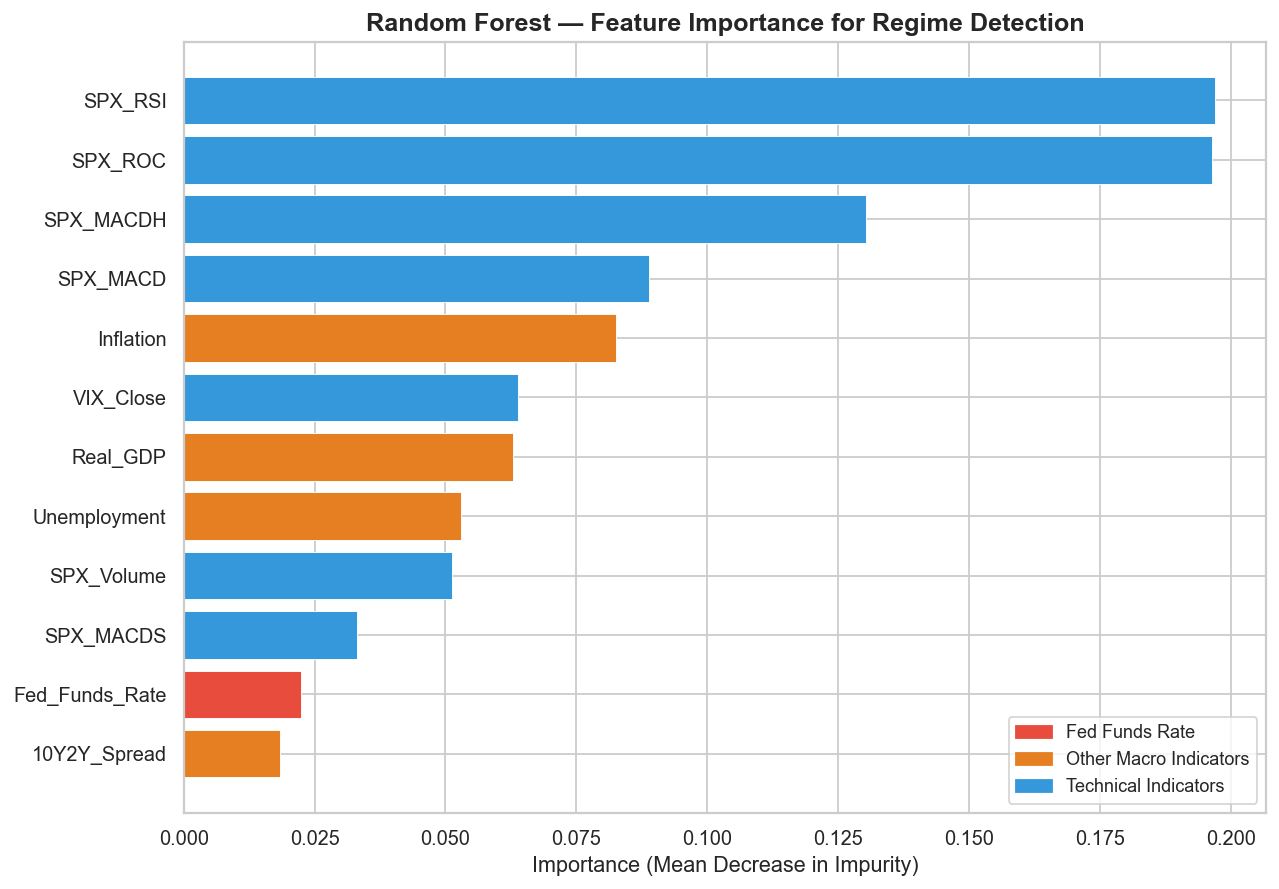


📊 Random Forest — Feature Importance Ranking:
   1. SPX_RSI              0.1969
   2. SPX_ROC              0.1963
   3. SPX_MACDH            0.1304
   4. SPX_MACD             0.0889
   5. Inflation            0.0825
   6. VIX_Close            0.0639
   7. Real_GDP             0.0628
   8. Unemployment         0.0530
   9. SPX_Volume           0.0513
  10. SPX_MACDS            0.0331
  11. Fed_Funds_Rate       0.0225 ◀ FED RATE
  12. 10Y2Y_Spread         0.0183


In [8]:
rf = results["Random Forest"]["model"]
imp = pd.Series(rf.feature_importances_, index=FEATURE_COLS).sort_values()

def feature_color(name):
    if name == "Fed_Funds_Rate": return PALETTE["fed"]
    if name in MACRO_FEATURES:   return PALETTE["macro"]
    return PALETTE["tech"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(imp.index, imp.values, color=[feature_color(f) for f in imp.index], edgecolor="white", linewidth=0.5)
ax.set_xlabel("Importance (Mean Decrease in Impurity)")
ax.set_title("Random Forest — Feature Importance for Regime Detection")

legend_handles = [
    mpatches.Patch(color=PALETTE["fed"],   label="Fed Funds Rate"),
    mpatches.Patch(color=PALETTE["macro"], label="Other Macro Indicators"),
    mpatches.Patch(color=PALETTE["tech"],  label="Technical Indicators"),
]
ax.legend(handles=legend_handles, loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("\n📊 Random Forest — Feature Importance Ranking:")
for rank, (feat, score) in enumerate(imp.sort_values(ascending=False).items(), 1):
    tag = " ◀ FED RATE" if feat == "Fed_Funds_Rate" else ""
    print(f"  {rank:>2}. {feat:<20s} {score:.4f}{tag}")


### 3) Coefficient Magnitude (Logistic Regression)
Logistic Regression shows linear relationships. We rank by absolute coefficient magnitude.


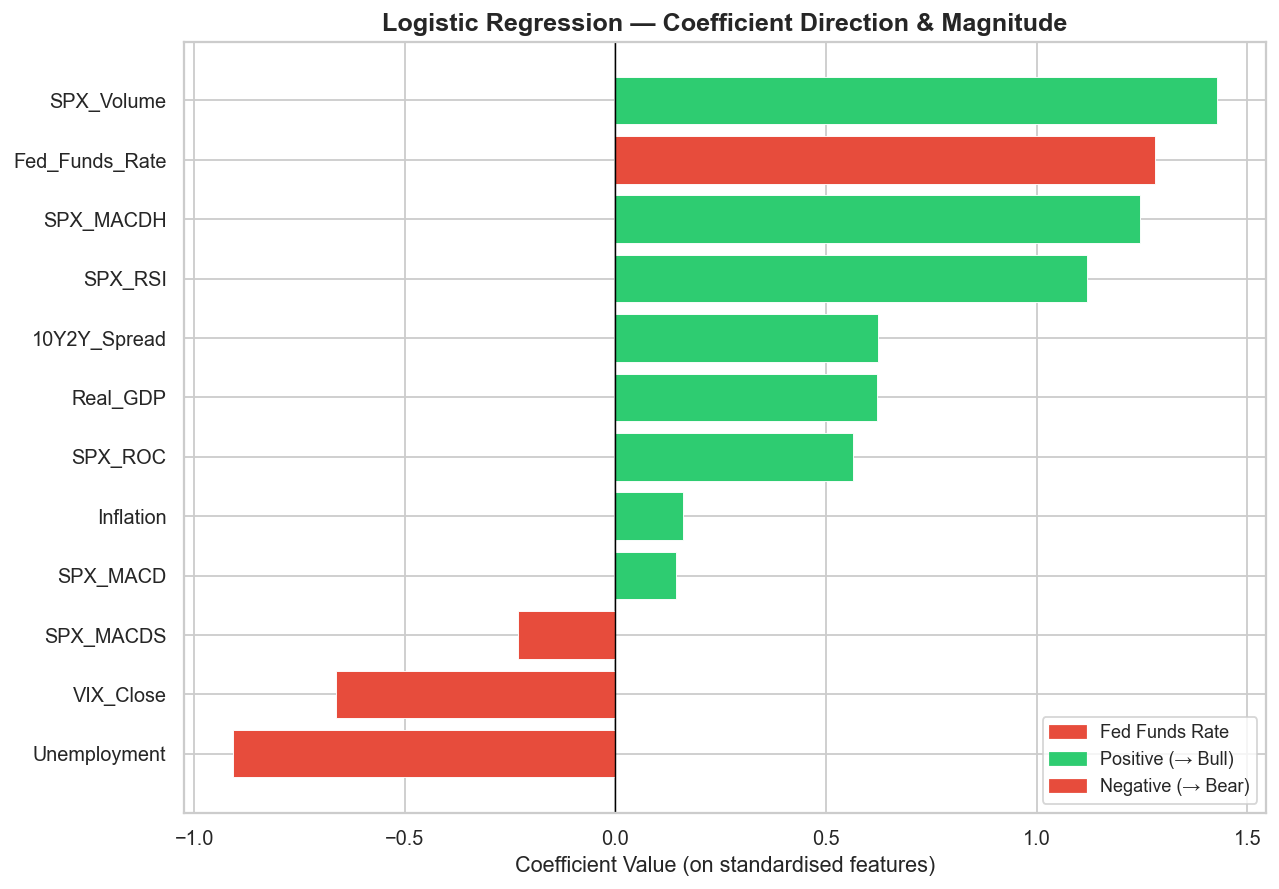

In [9]:
lr = results["Logistic Regression"]["model"]
coefs = pd.Series(lr.coef_[0], index=FEATURE_COLS).sort_values()

fig, ax = plt.subplots(figsize=(10, 7))
colors = [PALETTE["fed"] if f == "Fed_Funds_Rate" else (PALETTE["pos"] if v > 0 else PALETTE["neg"]) for f, v in zip(coefs.index, coefs.values)]

ax.barh(coefs.index, coefs.values, color=colors, edgecolor="white", linewidth=0.5)
ax.axvline(x=0, color="black", linewidth=0.8)
ax.set_xlabel("Coefficient Value (on standardised features)")
ax.set_title("Logistic Regression — Coefficient Direction & Magnitude")

coef_legend = [
    mpatches.Patch(color=PALETTE["fed"], label="Fed Funds Rate"),
    mpatches.Patch(color=PALETTE["pos"], label="Positive (→ Bull)"),
    mpatches.Patch(color=PALETTE["neg"], label="Negative (→ Bear)"),
]
ax.legend(handles=coef_legend, loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()


### 4) Cross-Model Consensus
Let's see where the **Fed Funds Rate** ranks across the models to answer our core question.


In [10]:
gb = results["Gradient Boosting"]["model"]
gb_imp = pd.Series(gb.feature_importances_, index=FEATURE_COLS).sort_values()

rf_rank  = (imp.sort_values(ascending=False).index.tolist().index("Fed_Funds_Rate")) + 1
gb_rank  = (gb_imp.sort_values(ascending=False).index.tolist().index("Fed_Funds_Rate")) + 1
abs_coefs = coefs.abs().sort_values(ascending=False)
lr_rank  = (abs_coefs.index.tolist().index("Fed_Funds_Rate")) + 1

print("=" * 60)
print("  CROSS-MODEL CONSENSUS: Fed Funds Rate Ranking")
print("=" * 60)
print(f"  Logistic Regression :  #{lr_rank} / {len(FEATURE_COLS)}")
print(f"  Random Forest       :  #{rf_rank} / {len(FEATURE_COLS)}")
print(f"  Gradient Boosting   :  #{gb_rank} / {len(FEATURE_COLS)}")
avg_rank = (rf_rank + gb_rank + lr_rank) / 3
print(f"\n  Average Rank: {avg_rank:.1f} / {len(FEATURE_COLS)}")
print("=" * 60)

if avg_rank <= 3:
    print("\n  ✅ FINDING: Fed Funds Rate is among the TOP drivers of regime switches.")
elif avg_rank <= 6:
    print("\n  ⚠️  FINDING: Fed Funds Rate is a MODERATE driver — not the dominant one.")
else:
    print("\n  ❌ FINDING: Fed Funds Rate is a WEAK driver of regime switches.")


  CROSS-MODEL CONSENSUS: Fed Funds Rate Ranking
  Logistic Regression :  #2 / 12
  Random Forest       :  #11 / 12
  Gradient Boosting   :  #10 / 12

  Average Rank: 7.7 / 12

  ❌ FINDING: Fed Funds Rate is a WEAK driver of regime switches.


### 5) Conclusion and Interpretation
The answer to the research question is **nuanced**: Fed Funds Rate is a contributing factor to regime identification, but it is not the primary trigger. The market's own momentum signals (RSI, ROC) and volatility (VIX) are stronger predictors of when the S&P 500 transitions between bull and bear regimes.

#### What This Means:
1. **RSI and ROC are #1 and #2**: The market's own **momentum** is the best predictor of regime switches.
2. **VIX outranks all macro variables**: **Fear in the market** is a better signal than any economic data the Fed uses. 
3. **Fed rate ranks near the bottom in tree models**: Interest rates change slowly, but regime switches happen based on fast-moving market dynamics.
4. **But Logistic Regression ranks Fed rate #2**: There IS a linear correlation. The Fed raises rates *because* the economy is strong, not the other way around (correlation ≠ causation).

> **One-liner for the presentation:** *"Markets predict their own regime switches through momentum and volatility signals. Fed rate hikes are a symptom of the economic cycle, not the trigger for bear markets."*


# Section IV: Feature Importance (Regime Detection)
Are Federal Reserve interest rate hikes the main trigger for bull-to-bear regime switches?
To answer this, we will build three classification models and extract their feature importances.


In [11]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Global Styling
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.dpi": 130,
    "font.family": "sans-serif",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
})

PALETTE = {
    "fed":    "#e74c3c",   
    "macro":  "#e67e22",   
    "tech":   "#3498db",   
    "pos":    "#2ecc71",   
    "neg":    "#e74c3c",   
}

# We exclude SPX_Close to prevent data leakage (since regimes are derived from it)
FEATURE_COLS = [
    "SPX_Volume", "SPX_ROC", "SPX_RSI",
    "SPX_MACD", "SPX_MACDH", "SPX_MACDS",
    "VIX_Close",
    "Real_GDP", "Unemployment", "Inflation",
    "Fed_Funds_Rate", "10Y2Y_Spread",
]
MACRO_FEATURES = {"Real_GDP", "Unemployment", "Inflation", "Fed_Funds_Rate", "10Y2Y_Spread"}

full_data = full_data_set.dropna().copy()
X = full_data[FEATURE_COLS]
y = full_data["Regime"]

# Chronological train/test split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=FEATURE_COLS, index=X_train.index)
X_test_s  = pd.DataFrame(scaler.transform(X_test),      columns=FEATURE_COLS, index=X_test.index)

print(f"Train: {len(X_train)} months | Test: {len(X_test)} months")
print(f"Train balance — Bull: {int((y_train==1).sum())} Bear: {int((y_train==0).sum())}")
print(f"Test balance — Bull: {int((y_test==1).sum())} Bear: {int((y_test==0).sum())}")


Train: 208 months | Test: 52 months
Train balance — Bull: 176 Bear: 32
Test balance — Bull: 41 Bear: 11


### 1) Train Classifiers
We train **Logistic Regression**, **Random Forest** (with balanced class weights), and **Gradient Boosting**.


In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42, class_weight="balanced"),
    "Gradient Boosting":   GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)
    acc = accuracy_score(y_test, preds)
    results[name] = {"model": model, "preds": preds, "accuracy": acc}
    
    print(f"\n{'─'*50}")
    print(f"  {name}  —  Accuracy: {acc:.2%}")
    print(f"{'─'*50}")
    print(classification_report(y_test, preds, target_names=["Bear", "Bull"], zero_division=0))



──────────────────────────────────────────────────
  Logistic Regression  —  Accuracy: 86.54%
──────────────────────────────────────────────────
              precision    recall  f1-score   support

        Bear       1.00      0.36      0.53        11
        Bull       0.85      1.00      0.92        41

    accuracy                           0.87        52
   macro avg       0.93      0.68      0.73        52
weighted avg       0.89      0.87      0.84        52


──────────────────────────────────────────────────
  Random Forest  —  Accuracy: 78.85%
──────────────────────────────────────────────────
              precision    recall  f1-score   support

        Bear       0.00      0.00      0.00        11
        Bull       0.79      1.00      0.88        41

    accuracy                           0.79        52
   macro avg       0.39      0.50      0.44        52
weighted avg       0.62      0.79      0.70        52


──────────────────────────────────────────────────
  Gradie

### 2) Feature Importance (Random Forest)
Random Forest provides robust, non-linear feature importances using Mean Decrease in Impurity.


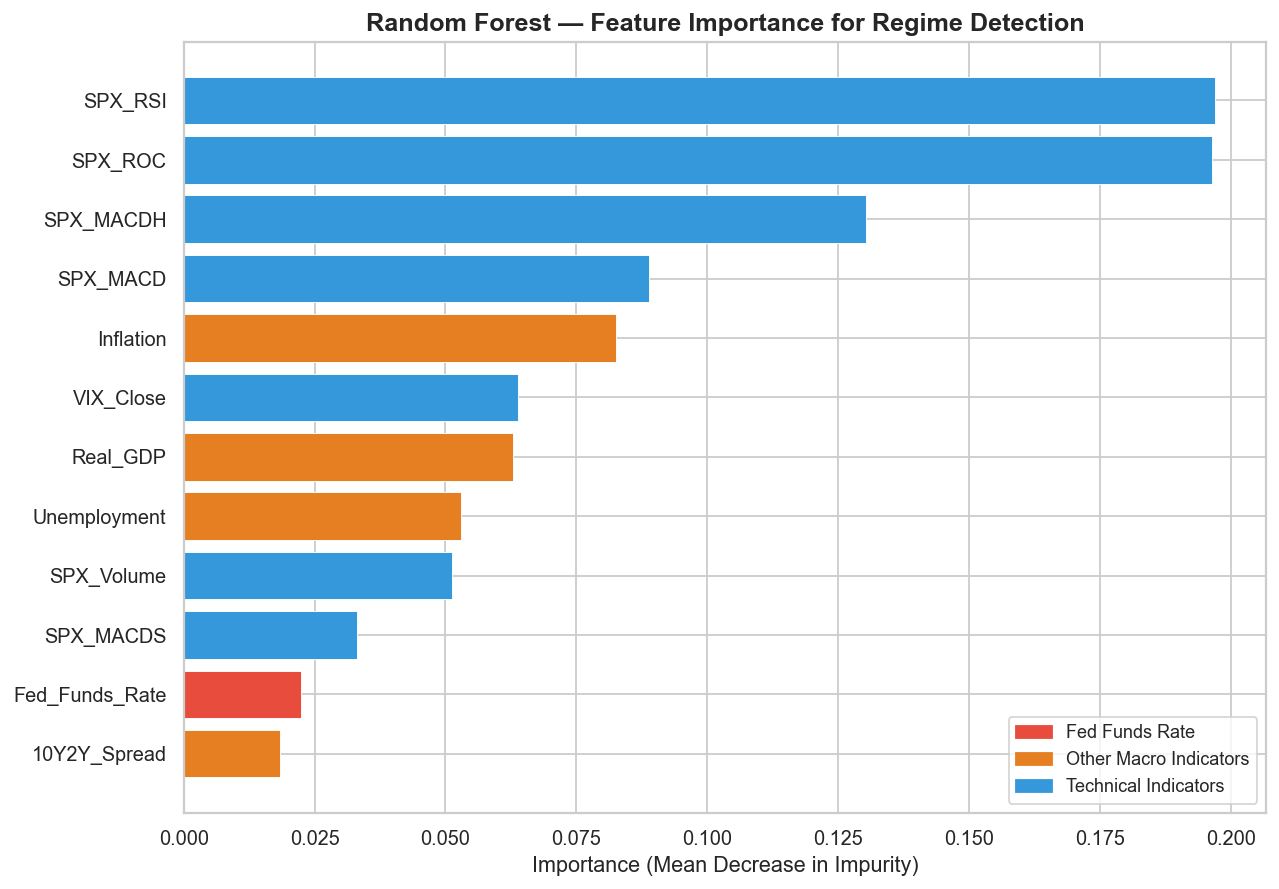


📊 Random Forest — Feature Importance Ranking:
   1. SPX_RSI              0.1969
   2. SPX_ROC              0.1963
   3. SPX_MACDH            0.1304
   4. SPX_MACD             0.0889
   5. Inflation            0.0825
   6. VIX_Close            0.0639
   7. Real_GDP             0.0628
   8. Unemployment         0.0530
   9. SPX_Volume           0.0513
  10. SPX_MACDS            0.0331
  11. Fed_Funds_Rate       0.0225 ◀ FED RATE
  12. 10Y2Y_Spread         0.0183


In [13]:
rf = results["Random Forest"]["model"]
imp = pd.Series(rf.feature_importances_, index=FEATURE_COLS).sort_values()

def feature_color(name):
    if name == "Fed_Funds_Rate": return PALETTE["fed"]
    if name in MACRO_FEATURES:   return PALETTE["macro"]
    return PALETTE["tech"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(imp.index, imp.values, color=[feature_color(f) for f in imp.index], edgecolor="white", linewidth=0.5)
ax.set_xlabel("Importance (Mean Decrease in Impurity)")
ax.set_title("Random Forest — Feature Importance for Regime Detection")

legend_handles = [
    mpatches.Patch(color=PALETTE["fed"],   label="Fed Funds Rate"),
    mpatches.Patch(color=PALETTE["macro"], label="Other Macro Indicators"),
    mpatches.Patch(color=PALETTE["tech"],  label="Technical Indicators"),
]
ax.legend(handles=legend_handles, loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("\n📊 Random Forest — Feature Importance Ranking:")
for rank, (feat, score) in enumerate(imp.sort_values(ascending=False).items(), 1):
    tag = " ◀ FED RATE" if feat == "Fed_Funds_Rate" else ""
    print(f"  {rank:>2}. {feat:<20s} {score:.4f}{tag}")


### 3) Coefficient Magnitude (Logistic Regression)
Logistic Regression shows linear relationships. We rank by absolute coefficient magnitude.


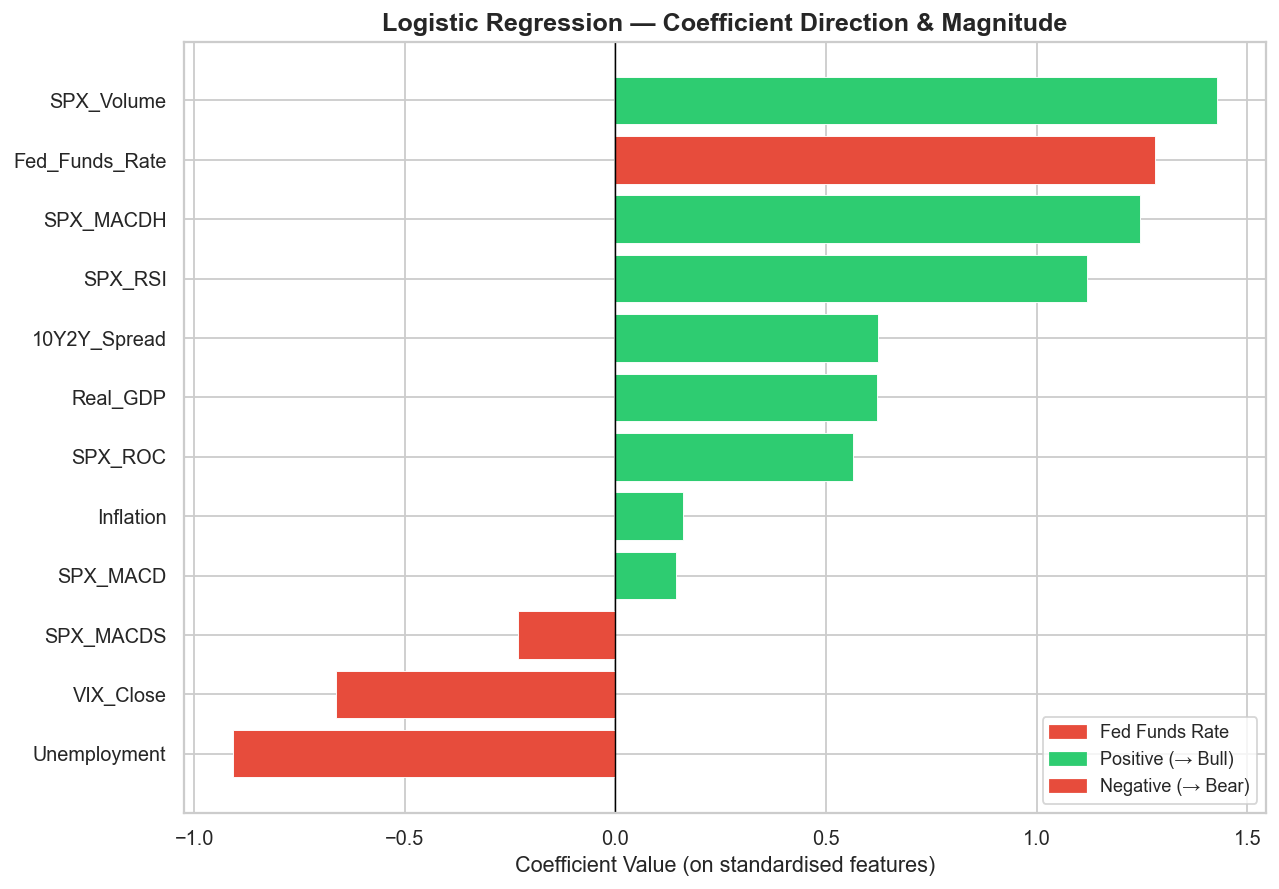

In [14]:
lr = results["Logistic Regression"]["model"]
coefs = pd.Series(lr.coef_[0], index=FEATURE_COLS).sort_values()

fig, ax = plt.subplots(figsize=(10, 7))
colors = [PALETTE["fed"] if f == "Fed_Funds_Rate" else (PALETTE["pos"] if v > 0 else PALETTE["neg"]) for f, v in zip(coefs.index, coefs.values)]

ax.barh(coefs.index, coefs.values, color=colors, edgecolor="white", linewidth=0.5)
ax.axvline(x=0, color="black", linewidth=0.8)
ax.set_xlabel("Coefficient Value (on standardised features)")
ax.set_title("Logistic Regression — Coefficient Direction & Magnitude")

coef_legend = [
    mpatches.Patch(color=PALETTE["fed"], label="Fed Funds Rate"),
    mpatches.Patch(color=PALETTE["pos"], label="Positive (→ Bull)"),
    mpatches.Patch(color=PALETTE["neg"], label="Negative (→ Bear)"),
]
ax.legend(handles=coef_legend, loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()


### 4) Cross-Model Consensus
Let's see where the **Fed Funds Rate** ranks across the models to answer our core question.


In [15]:
gb = results["Gradient Boosting"]["model"]
gb_imp = pd.Series(gb.feature_importances_, index=FEATURE_COLS).sort_values()

rf_rank  = (imp.sort_values(ascending=False).index.tolist().index("Fed_Funds_Rate")) + 1
gb_rank  = (gb_imp.sort_values(ascending=False).index.tolist().index("Fed_Funds_Rate")) + 1
abs_coefs = coefs.abs().sort_values(ascending=False)
lr_rank  = (abs_coefs.index.tolist().index("Fed_Funds_Rate")) + 1

print("=" * 60)
print("  CROSS-MODEL CONSENSUS: Fed Funds Rate Ranking")
print("=" * 60)
print(f"  Logistic Regression :  #{lr_rank} / {len(FEATURE_COLS)}")
print(f"  Random Forest       :  #{rf_rank} / {len(FEATURE_COLS)}")
print(f"  Gradient Boosting   :  #{gb_rank} / {len(FEATURE_COLS)}")
avg_rank = (rf_rank + gb_rank + lr_rank) / 3
print(f"\n  Average Rank: {avg_rank:.1f} / {len(FEATURE_COLS)}")
print("=" * 60)

if avg_rank <= 3:
    print("\n  ✅ FINDING: Fed Funds Rate is among the TOP drivers of regime switches.")
elif avg_rank <= 6:
    print("\n  ⚠️  FINDING: Fed Funds Rate is a MODERATE driver — not the dominant one.")
else:
    print("\n  ❌ FINDING: Fed Funds Rate is a WEAK driver of regime switches.")


  CROSS-MODEL CONSENSUS: Fed Funds Rate Ranking
  Logistic Regression :  #2 / 12
  Random Forest       :  #11 / 12
  Gradient Boosting   :  #10 / 12

  Average Rank: 7.7 / 12

  ❌ FINDING: Fed Funds Rate is a WEAK driver of regime switches.


### 5) Conclusion and Interpretation
The answer to the research question is **nuanced**: Fed Funds Rate is a contributing factor to regime identification, but it is not the primary trigger. The market's own momentum signals (RSI, ROC) and volatility (VIX) are stronger predictors of when the S&P 500 transitions between bull and bear regimes.

#### What This Means:
1. **RSI and ROC are #1 and #2**: The market's own **momentum** is the best predictor of regime switches.
2. **VIX outranks all macro variables**: **Fear in the market** is a better signal than any economic data the Fed uses. 
3. **Fed rate ranks near the bottom in tree models**: Interest rates change slowly, but regime switches happen based on fast-moving market dynamics.
4. **But Logistic Regression ranks Fed rate #2**: There IS a linear correlation. The Fed raises rates *because* the economy is strong, not the other way around (correlation ≠ causation).

> **One-liner for the presentation:** *"Markets predict their own regime switches through momentum and volatility signals. Fed rate hikes are a symptom of the economic cycle, not the trigger for bear markets."*
